In [6]:
!pip install -r requirements.txt

training rf model...
rf model accuracy: 0.9694
training ffnn model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8785 - loss: 0.4341
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9656 - loss: 0.1168
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9764 - loss: 0.0810
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9830 - loss: 0.0564
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9866 - loss: 0.0433
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
ffnn model accuracy: 0.9750
training cnn model...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.9052 - loss: 0.3059
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9862 - loss: 0.0430
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9896 - loss: 0.0325
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 17ms/step - accuracy: 0.9926 - loss: 0.0241
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 18ms/step - accuracy: 0.9939 - loss: 0.0186
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
cnn model accuracy: 0.9917


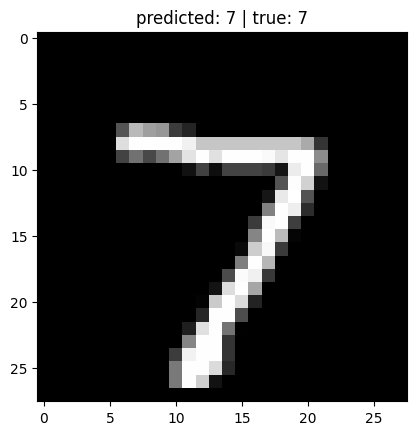

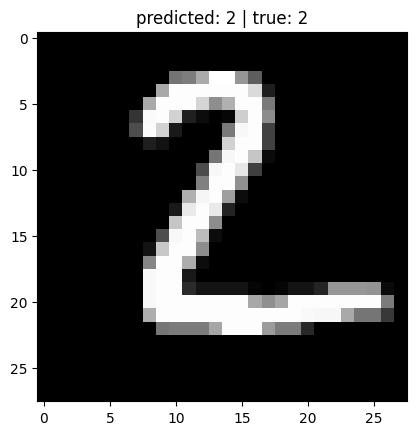

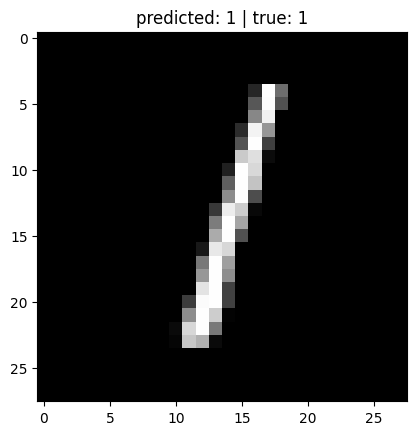

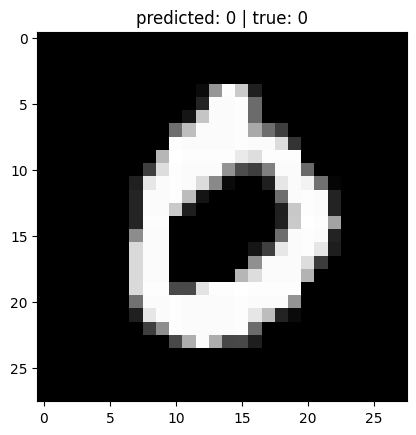

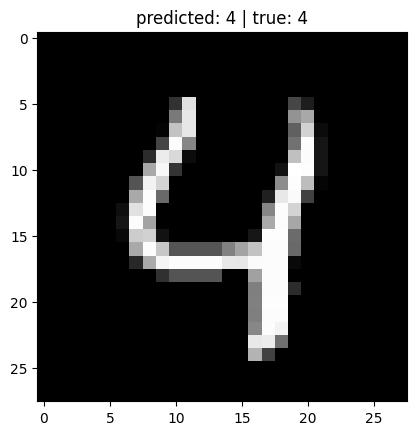

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split

from mnist_classifier import MnistClassifier

#load and reshape the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train_ffnn = X_train.reshape(-1, 784) / 255.0
X_test_ffnn = X_test.reshape(-1, 784) / 255.0

X_train_cnn = X_train.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

#function to evaluate the model
def evaluate_model(algorithm, X_train, X_test, y_train, y_test):
    print(f"training {algorithm} model...")
    classifier = MnistClassifier(algorithm)

    classifier.train(X_train, y_train)

    y_pred = classifier.predict(X_test)

    accuracy = np.mean(y_pred == y_test)
    print(f"{algorithm} model accuracy: {accuracy:.4f}")

    #visualize predictions for CNN
    if algorithm == 'cnn':
        for i in range(5):
            plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
            plt.title(f"predicted: {y_pred[i]} | true: {y_test[i]}")
            plt.show()

#train and evaluate models for algorithms
algorithms = ['rf', 'ffnn', 'cnn']
for algorithm in algorithms:
    if algorithm == 'cnn':
        evaluate_model(algorithm, X_train_cnn, X_test_cnn, y_train, y_test)
    else:
        evaluate_model(algorithm, X_train_ffnn, X_test_ffnn, y_train, y_test)
